# Import Libraries

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset

In [107]:
df = pd.read_csv('human_cognitive_performance.csv')
df

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,U79996,55,Male,7.8,9,Non-Vegetarian,9.4,Low,157,312.34,55,50.80,46.49
79996,U79997,35,Female,9.8,6,Vegetarian,6.5,Medium,130,290.17,86,94.89,92.41
79997,U79998,32,Female,7.3,10,Non-Vegetarian,7.5,Low,462,249.57,72,63.51,67.35
79998,U79999,34,Male,8.7,8,Vegetarian,7.2,Medium,96,319.48,82,81.43,77.95


## Check The Data

In [108]:
df.shape

(80000, 13)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80000.0,38.525525,12.101876,18.0,28.00,39.00,49.00,59.00
Sleep_Duration,80000.0,7.005332,1.734435,4.0,5.50,7.00,8.50,10.00
Stress_Level,80000.0,5.493762,2.865308,1.0,3.00,5.00,8.00,10.00
Daily_Screen_Time,80000.0,6.504646,3.167072,1.0,3.80,6.50,9.20,12.00
Caffeine_Intake,80000.0,248.988213,144.541990,0.0,123.00,249.00,375.00,499.00
Reaction_Time,80000.0,399.973579,115.369329,200.0,300.15,400.36,499.25,599.99
Memory_Test_Score,80000.0,69.498350,17.305659,40.0,55.00,70.00,85.00,99.00
Cognitive_Score,80000.0,58.172395,23.058522,0.0,40.91,58.36,75.83,100.00
AI_Predicted_Score,80000.0,58.121357,23.119598,0.0,40.85,58.36,75.89,100.00


In [111]:
df.sample

<bound method NDFrame.sample of       User_ID  Age  Gender  Sleep_Duration  Stress_Level       Diet_Type  \
0          U1   57  Female             6.5             3  Non-Vegetarian   
1          U2   39  Female             7.6             9  Non-Vegetarian   
2          U3   26    Male             8.2             6      Vegetarian   
3          U4   32    Male             7.8             9      Vegetarian   
4          U5   50    Male             9.7             2  Non-Vegetarian   
...       ...  ...     ...             ...           ...             ...   
79995  U79996   55    Male             7.8             9  Non-Vegetarian   
79996  U79997   35  Female             9.8             6      Vegetarian   
79997  U79998   32  Female             7.3            10  Non-Vegetarian   
79998  U79999   34    Male             8.7             8      Vegetarian   
79999  U80000   41  Female             7.9             7      Vegetarian   

       Daily_Screen_Time Exercise_Frequency  Caffeine_I

In [112]:
df.nunique()

User_ID               80000
Age                      42
Gender                    3
Sleep_Duration           61
Stress_Level             10
Diet_Type                 3
Daily_Screen_Time       111
Exercise_Frequency        3
Caffeine_Intake         500
Reaction_Time         34595
Memory_Test_Score        60
Cognitive_Score        9492
AI_Predicted_Score     9541
dtype: int64

## Exploratory Data Analysis

In [113]:
df.isna().sum()

User_ID               0
Age                   0
Gender                0
Sleep_Duration        0
Stress_Level          0
Diet_Type             0
Daily_Screen_Time     0
Exercise_Frequency    0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
AI_Predicted_Score    0
dtype: int64

In [114]:
df.duplicated().sum()

0

In [115]:
df = df.drop(columns=['User_ID'], errors='ignore')
df

,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,55,Male,7.8,9,Non-Vegetarian,9.4,Low,157,312.34,55,50.80,46.49
79996,35,Female,9.8,6,Vegetarian,6.5,Medium,130,290.17,86,94.89,92.41
79997,32,Female,7.3,10,Non-Vegetarian,7.5,Low,462,249.57,72,63.51,67.35
79998,34,Male,8.7,8,Vegetarian,7.2,Medium,96,319.48,82,81.43,77.95


In [116]:
num_cols = ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time', 'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score', 'Cognitive_Score', 'AI_Predicted_Score']
cat_cols = ['Gender', 'Diet_Type', 'Exercise_Frequency']

print(len(num_cols))
print(len(cat_cols))

9
3


## Visualization

In [117]:
colors = ['#DDEB9D', '#A0C878', '#626F47', '#A4B465', '#F5ECD5', '#DFD0B8', '#948979', '#F0BB78', '#E9A319', '#A86523']

### 1. Histogram Of Num_Cols

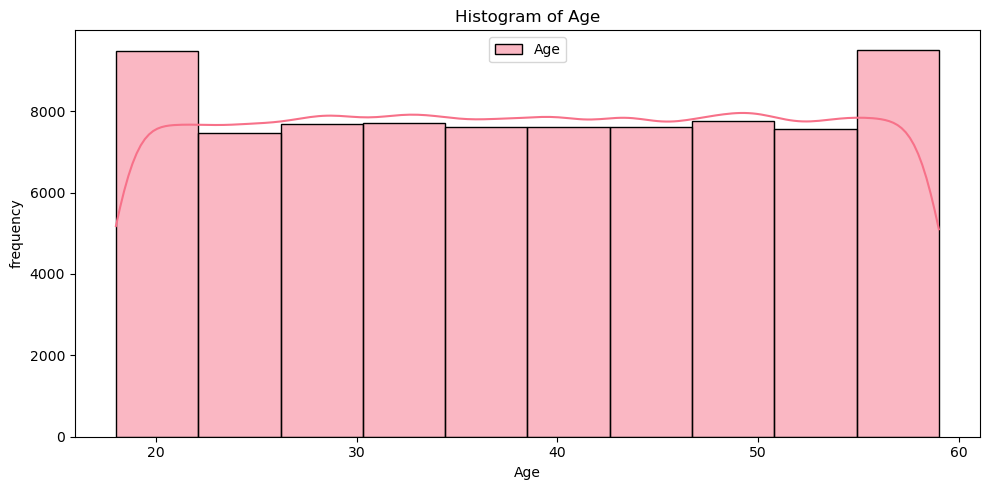

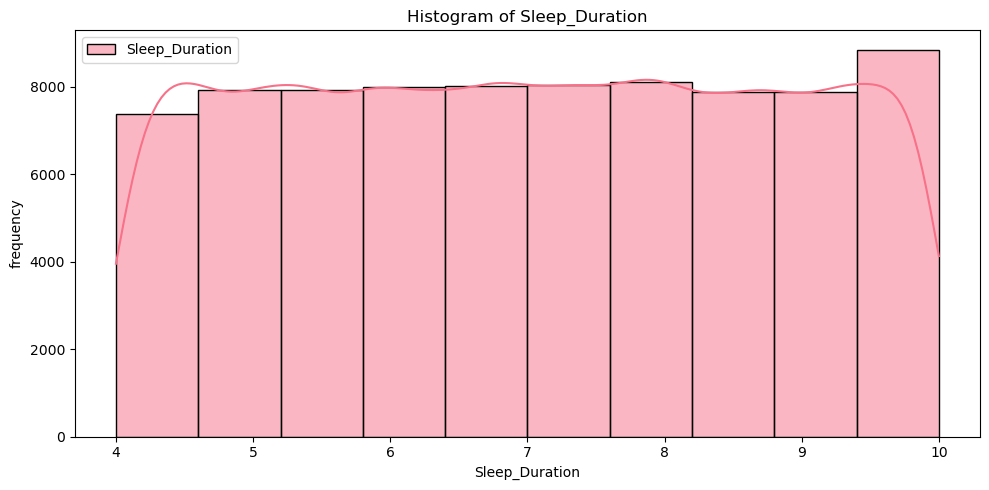

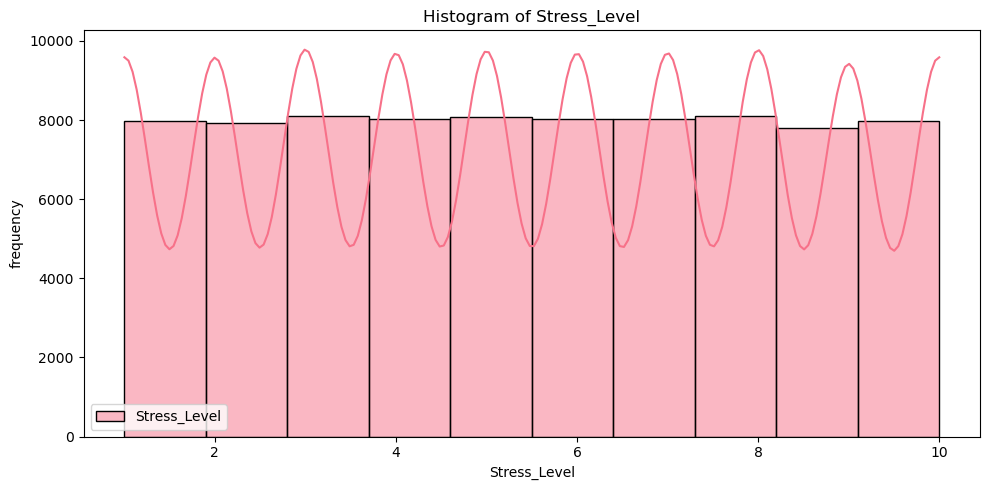

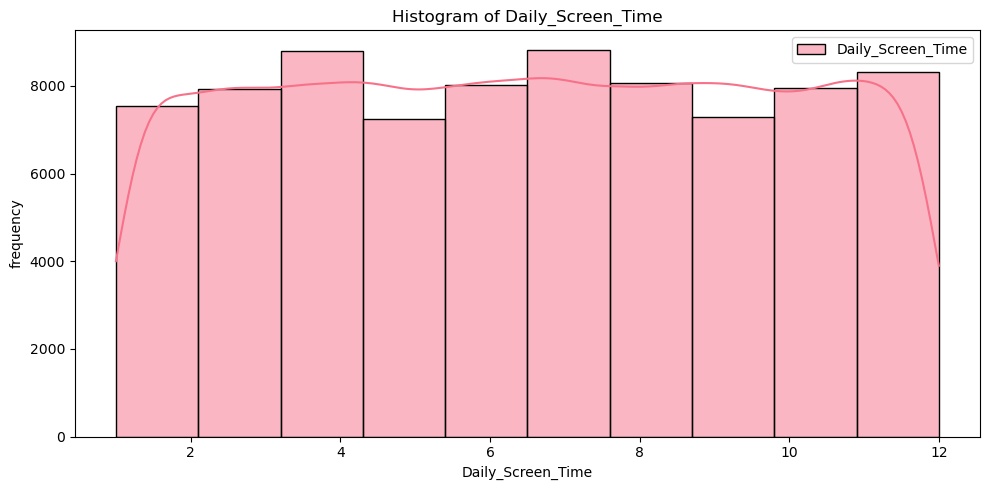

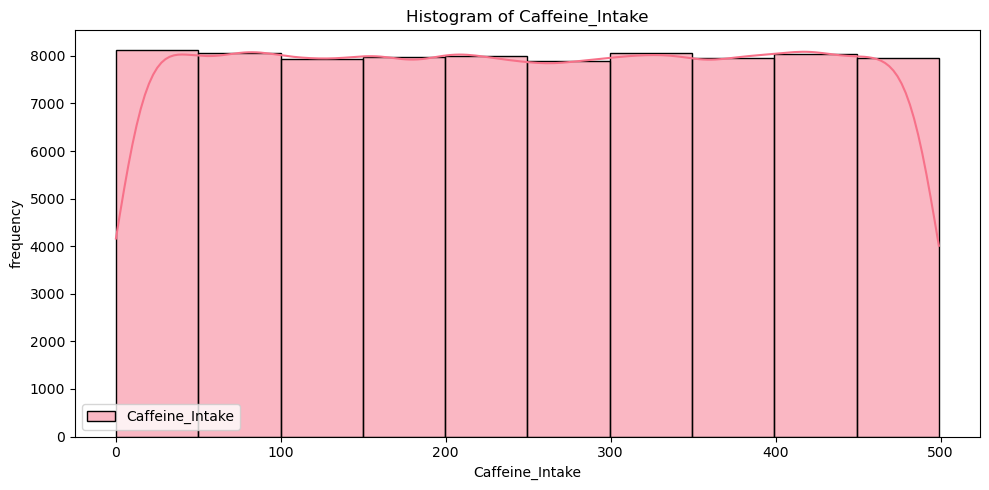

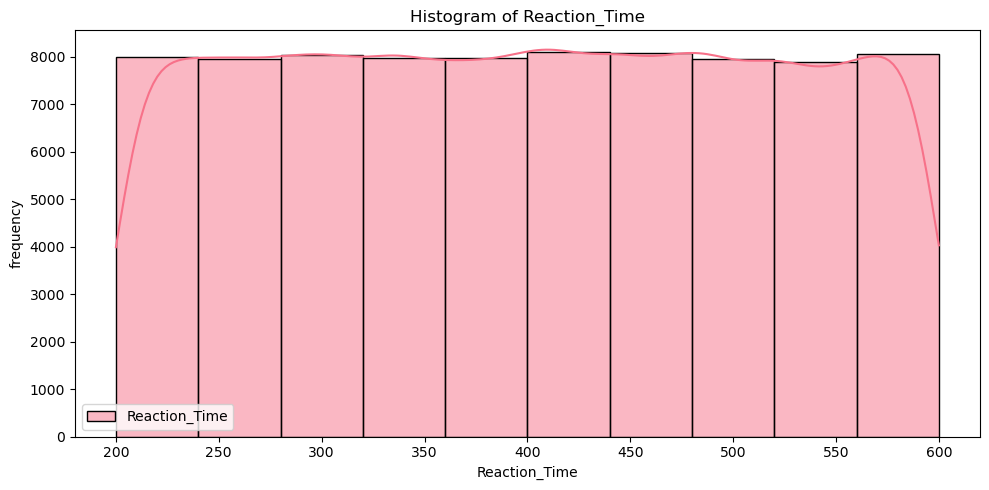

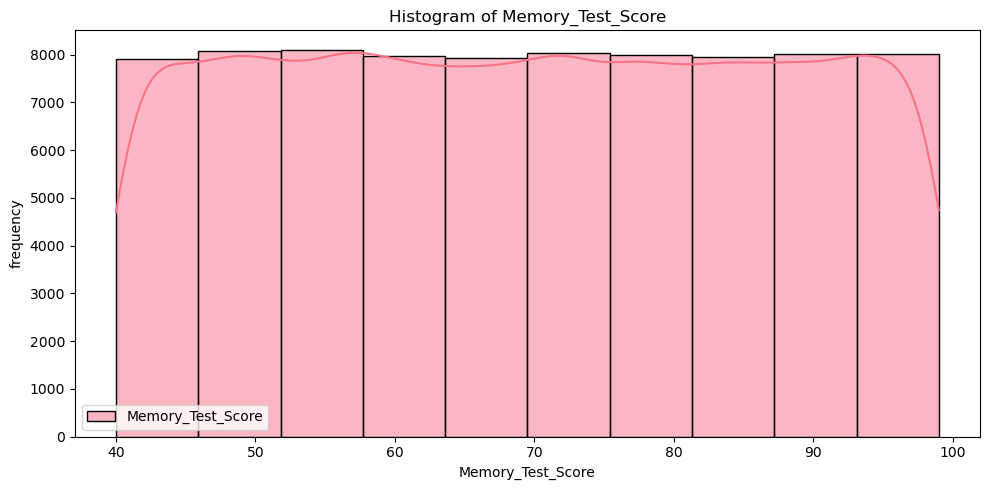

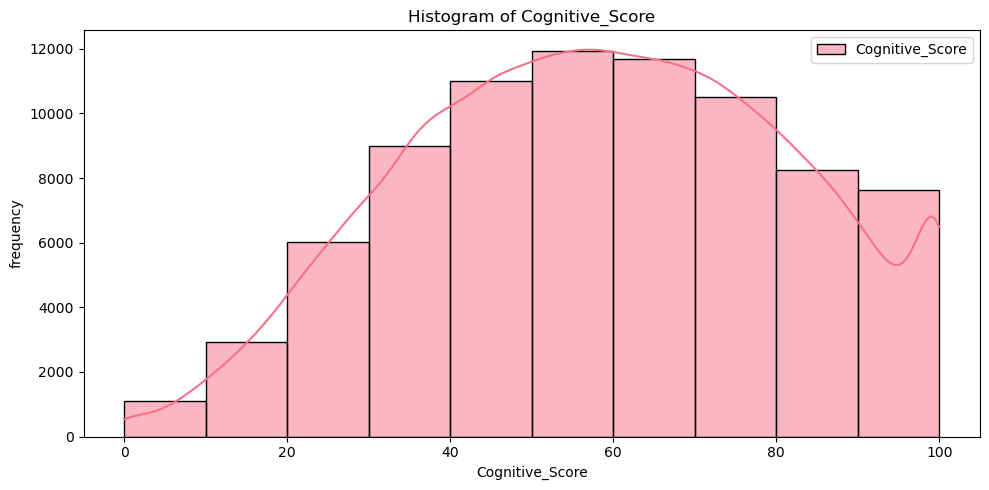

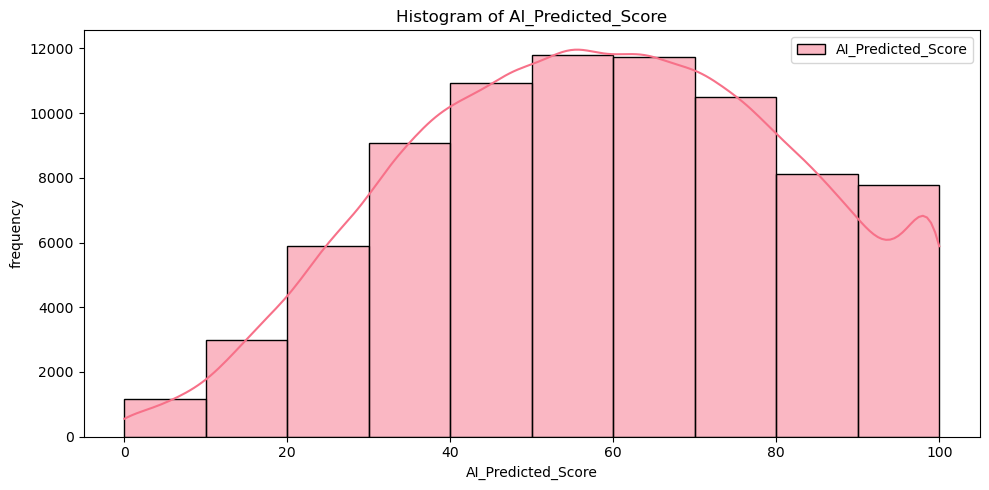

In [118]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[[col]], kde=True, palette='husl', bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout()
    plt.show()

### 2. Countplot Of Cat_Cols

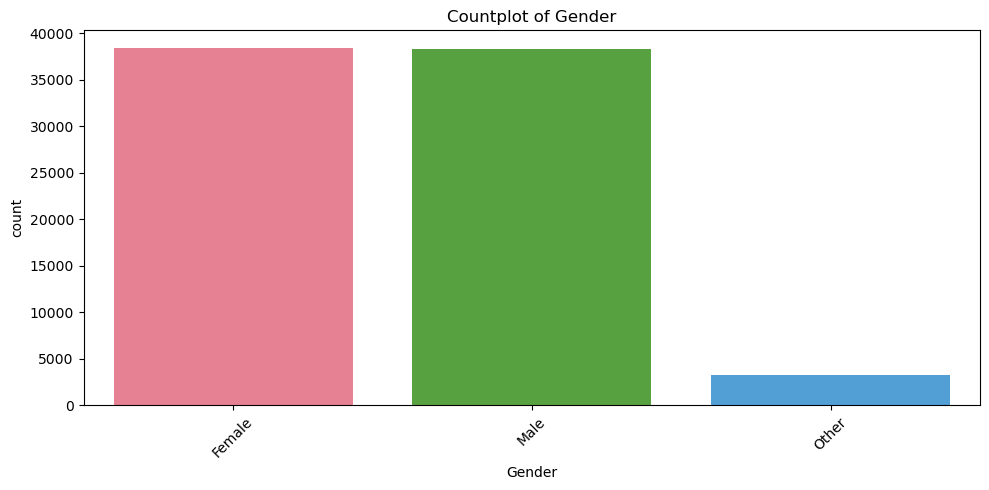

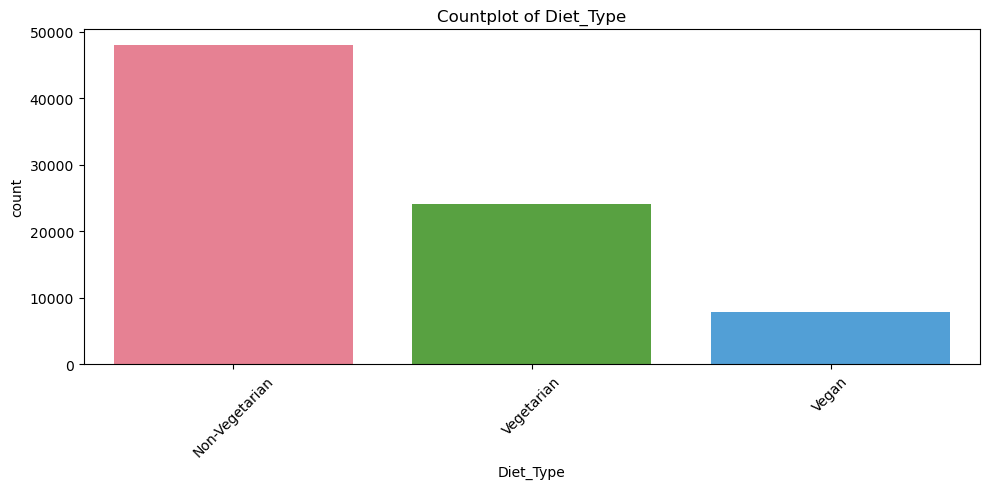

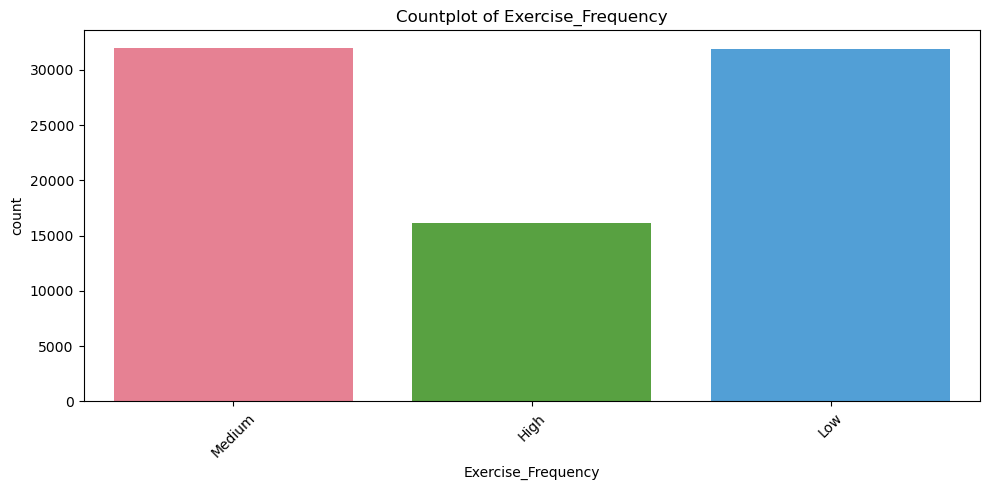

In [119]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='husl')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3. Age vs Cognitive Score

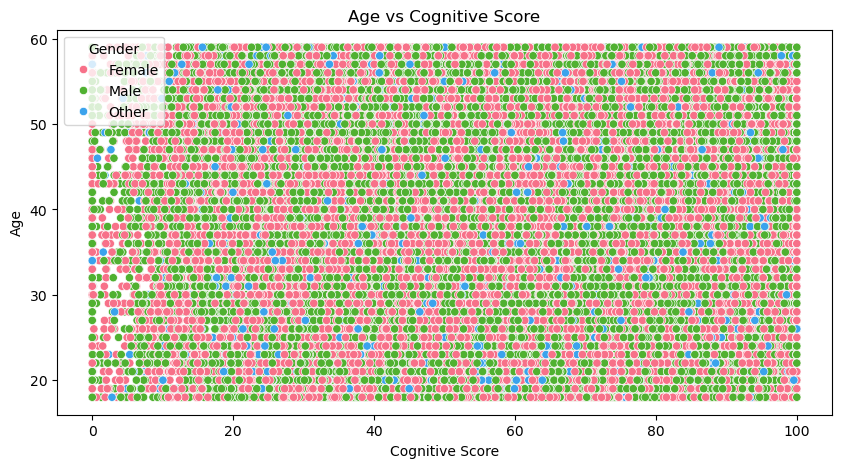

In [120]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Cognitive_Score'], y=df['Age'], hue=df['Gender'], palette='husl')
plt.title('Age vs Cognitive Score')
plt.xlabel('Cognitive Score')
plt.ylabel('Age')
plt.show()

### 4. Age vs Stress Level

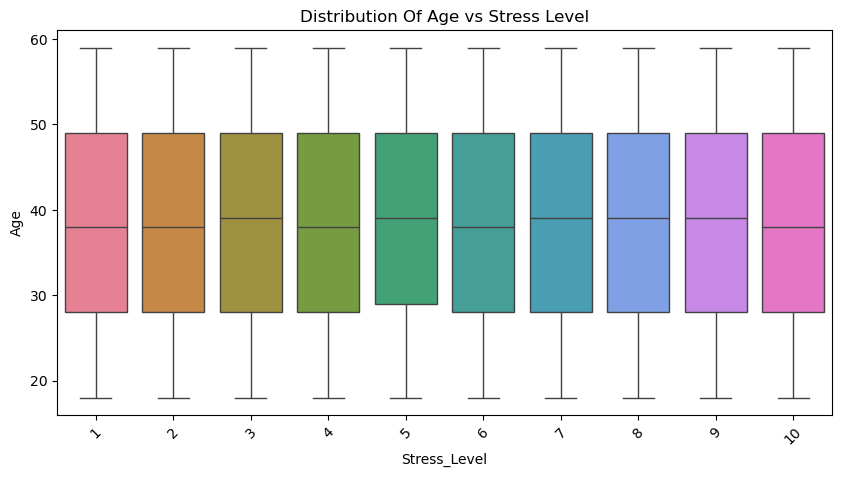

In [121]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Stress_Level'], y=df['Age'], data=df, palette='husl')
plt.title('Distribution Of Age vs Stress Level')
plt.xlabel('Stress_Level')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

### 5. Stress Levels By Gender

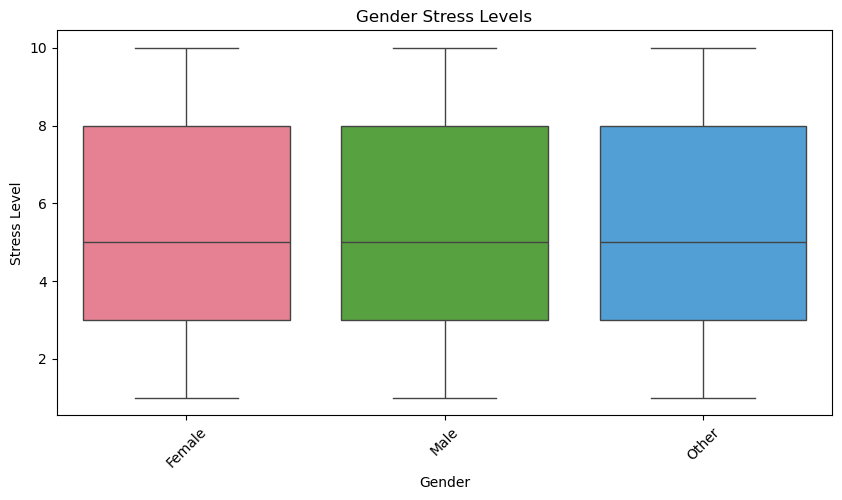

In [122]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Gender'], y=df['Stress_Level'], data=df, palette='husl')
plt.title('Gender Stress Levels')
plt.xlabel('Gender')
plt.ylabel('Stress Level')
plt.xticks(rotation=45)
plt.show()

### 6. Exercise Frequency By Gender

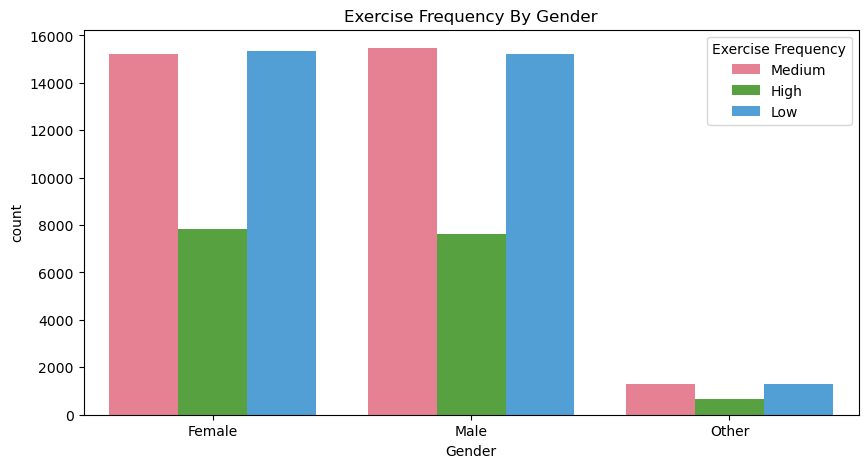

In [123]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Gender'], hue=df['Exercise_Frequency'], palette='husl')
plt.title('Exercise Frequency By Gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.legend(title='Exercise Frequency')
plt.show()

### 7. Memory Test Score vs Cognitive Score

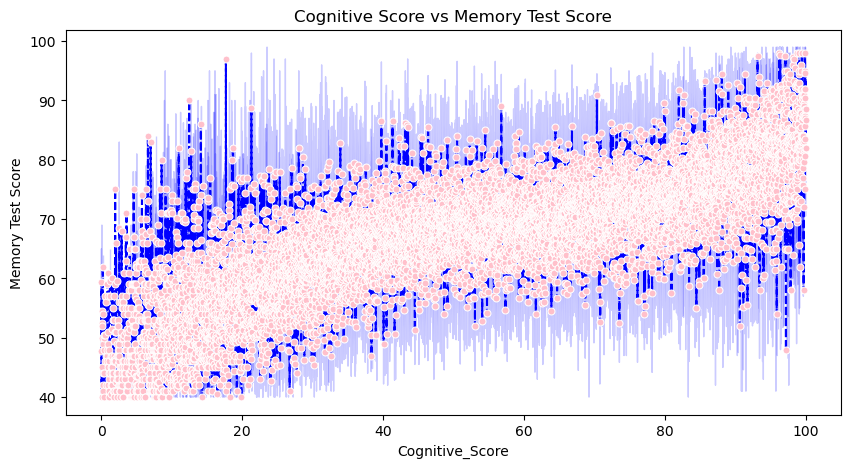

In [63]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['Cognitive_Score'], y=df['Memory_Test_Score'], marker='o', linestyle='dashed', markerfacecolor='pink', markersize=5, color='blue')
plt.title('Cognitive Score vs Memory Test Score')
plt.xlabel('Cognitive_Score')
plt.ylabel('Memory Test Score')
plt.show()

### 8. Sleep Duration vs Daily Screen Time

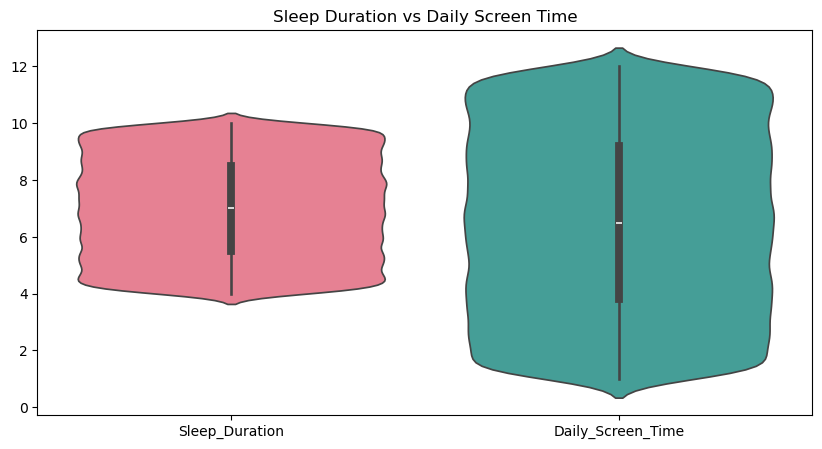

In [124]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df[['Sleep_Duration', 'Daily_Screen_Time']], palette='husl')
plt.title('Sleep Duration vs Daily Screen Time')
plt.show()

### 8. Correlation Map

In [125]:
df['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [126]:
df['Diet_Type'].unique()

array(['Non-Vegetarian', 'Vegetarian', 'Vegan'], dtype=object)

In [127]:
df['Exercise_Frequency'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [128]:
val = {'Gender': {'Female': 0, 'Male': 1, 'Other': 2}, 
       'Diet_Type': {'Non-Vegetarian': 0, 'Vegetarian': 1, 'Vegan': 2},
      'Exercise_Frequency': {'Low': 0, 'Medium': 1, 'High': 2}}
df.replace(val, inplace=True)
df

,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,57,0,6.5,3,0,6.5,1,41,583.33,65,36.71,39.77
1,39,0,7.6,9,0,10.8,2,214,368.24,58,54.35,57.68
2,26,1,8.2,6,1,5.7,0,429,445.21,49,32.57,29.54
3,32,1,7.8,9,1,8.3,0,464,286.33,94,70.15,74.59
4,50,1,9.7,2,0,11.3,1,365,237.65,62,87.54,91.78
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,55,1,7.8,9,0,9.4,0,157,312.34,55,50.80,46.49
79996,35,0,9.8,6,1,6.5,1,130,290.17,86,94.89,92.41
79997,32,0,7.3,10,0,7.5,0,462,249.57,72,63.51,67.35
79998,34,1,8.7,8,1,7.2,1,96,319.48,82,81.43,77.95


In [129]:
correlation = df.corr()

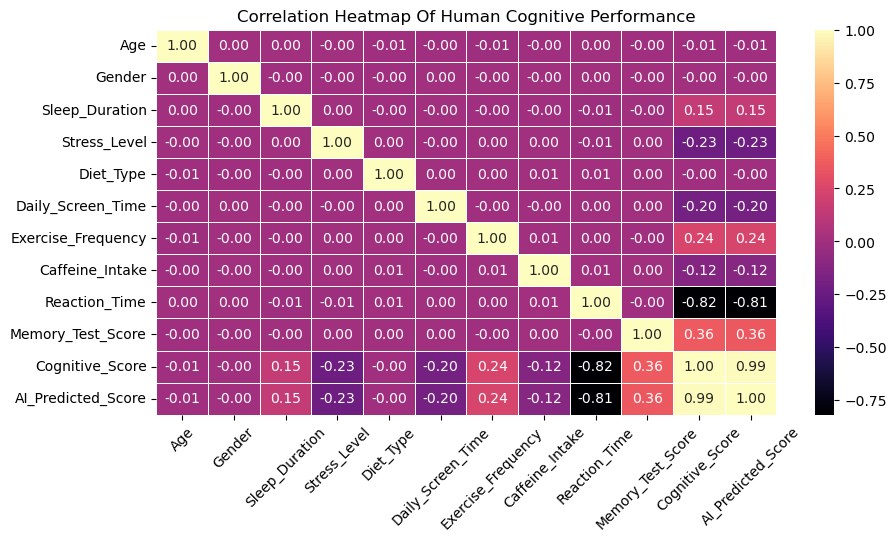

In [130]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True, cmap='magma', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap Of Human Cognitive Performance')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Predictive Modeling

### 1. Train Test Split

In [134]:
df = df.drop(['AI_Predicted_Score'], axis=1)
df

,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score
0,57,0,6.5,3,0,6.5,1,41,583.33,65,36.71
1,39,0,7.6,9,0,10.8,2,214,368.24,58,54.35
2,26,1,8.2,6,1,5.7,0,429,445.21,49,32.57
3,32,1,7.8,9,1,8.3,0,464,286.33,94,70.15
4,50,1,9.7,2,0,11.3,1,365,237.65,62,87.54
...,...,...,...,...,...,...,...,...,...,...,...
79995,55,1,7.8,9,0,9.4,0,157,312.34,55,50.80
79996,35,0,9.8,6,1,6.5,1,130,290.17,86,94.89
79997,32,0,7.3,10,0,7.5,0,462,249.57,72,63.51
79998,34,1,8.7,8,1,7.2,1,96,319.48,82,81.43


In [153]:
features = ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time', 'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score']
target = 'Cognitive_Score'

X = df[features]
y = df[target]

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(64000, 7) (16000, 7)


### 2. Models

In [157]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decison Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

In [158]:
best_model = None
best_accuracy = 0
best_model_name = ''

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n {name} Accuracy: {accuracy}')

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.